In [30]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.append("/Users/redstar/work/analysisHAL_miya/scripts/python_code-set/lib")
from common.io_data_bin          import input_bin_data_naxyzb, input_bin_data_nt
from common.statistics           import make_mean_err, make_JKsample
from fitting.fitfunc_type        import set_fitfunc_from_fname
from misc_QM.special_functions   import sph_harm_xyz, sph_harm_A1_xyz
from lattice.rotation_projection import rot_proj
from lattice.calc_laplacian      import lap, lap_4th_proc
from lattice.calc_potential      import calc_potential_t2, calc_potential_t2_num
from lattice.make_r_coordinates  import xyzdata_to_rdata, make_r_coord, make_rbin, divide_wave_L04, rbin_L04_separation
from lattice.misner_method       import Sph_harm_deco_misner
from sch_diffeq.solve_diffeq     import solve_sch_diff
from Tmatrix.convert_mat         import convert_TtoS
from Tmatrix.calc_phase_shift    import calc_phase_Sii, within_one
from sch_finiteV.solve_sch_finiteV import solve_sch_Fvol, solve_sch_Fvol_4th_prec
from multiprocessing             import Pool
# for fitting and phase shift calculation
from scipy.optimize import curve_fit
from sch_gauss_exp.solve_sch_GEM   import solve_sch_GEM

In [3]:
Lsize = 4
Tsize = 8

In [21]:
wave_org = np.array([np.fromfile("4pt_correlator_%d"%it,'<c16') for it in range(Tsize)]).reshape(Tsize, Lsize, Lsize, Lsize)

In [10]:
Nrelpt = 8
relpts = np.array([[(i%2)*2, (i//2)%2*2, (i//2)//2*2 ] for i in range(Nrelpt)])

In [13]:
ls

2pt_pi_8tave              4pt_correlator_6          NBS_rel8tave_x00y02z02
4pt_correlator_0          4pt_correlator_7          NBS_rel8tave_x02y00z00
4pt_correlator_1          NBS_exact8tave_x00y00z00  NBS_rel8tave_x02y00z02
4pt_correlator_2          NBS_lowmode_8tave         NBS_rel8tave_x02y02z00
4pt_correlator_3          NBS_rel8tave_x00y00z00    NBS_rel8tave_x02y02z02
4pt_correlator_4          NBS_rel8tave_x00y00z02    Untitled.ipynb
4pt_correlator_5          NBS_rel8tave_x00y02z00


In [14]:
wave_alt_low = np.fromfile("NBS_lowmode_8tave",'<c16').reshape(Tsize, Lsize, Lsize, Lsize)

In [15]:
wave_alt_highexa = np.fromfile("NBS_exact8tave_x%02dy%02dz%02d"%(relpts[0,0],relpts[0,1],relpts[0,2]),'<c16').reshape(Tsize, Lsize, Lsize, Lsize)

In [17]:
wave_alt_highrel = np.array([np.fromfile("NBS_rel8tave_x%02dy%02dz%02d"%(relpts[i,0],relpts[i,1],relpts[i,2]),'<c16') for i in range(Nrelpt)]).reshape(Nrelpt, Tsize, Lsize, Lsize, Lsize)

In [18]:
wave_alt = wave_alt_low + wave_alt_highexa - wave_alt_highrel[0] + np.mean(wave_alt_highrel,axis=0)

In [26]:
wave_diff = (wave_org - wave_alt) / wave_org

In [28]:
wave_diff

array([[[[-4.63419583e-16+4.29515419e-29j,
           7.32661620e-16-1.96350143e-31j,
           1.76624208e-13-2.06925817e-26j,
           5.93437303e-15+7.42854021e-29j],
         [-4.12384574e-16+1.01123208e-30j,
           3.97878152e-16-2.00852036e-30j,
           2.16275632e-15-5.27134005e-30j,
          -3.42493711e-16+2.63471158e-32j],
         [-4.62677579e-14-3.52045697e-27j,
          -1.63481518e-16+3.00669826e-32j,
          -9.06806821e-14-2.41807185e-26j,
          -1.58028727e-14+2.08341252e-29j],
         [ 1.27620303e-16-5.77518411e-32j,
           1.39205105e-16+2.18760143e-32j,
          -5.66627616e-16-1.33777856e-31j,
           6.48141830e-16+2.59272958e-31j]],

        [[ 1.39435114e-16-7.43035723e-32j,
           1.82891004e-16+1.24780894e-32j,
           4.01315171e-16-1.68917824e-31j,
           7.50444891e-16+6.93326697e-31j],
         [ 0.00000000e+00+0.00000000e+00j,
          -1.19662549e-15-2.12149991e-31j,
           0.00000000e+00+0.00000000e+00j,
    

In [31]:
wave_org_r = np.array([xyzdata_to_rdata(wave_org[it],False)[1] for it in range(Tsize)])

In [33]:
r = xyzdata_to_rdata(wave_org[0],False)[0].real

In [34]:
wave_alt_r = np.array([xyzdata_to_rdata(wave_alt[it],False)[1] for it in range(Tsize)])

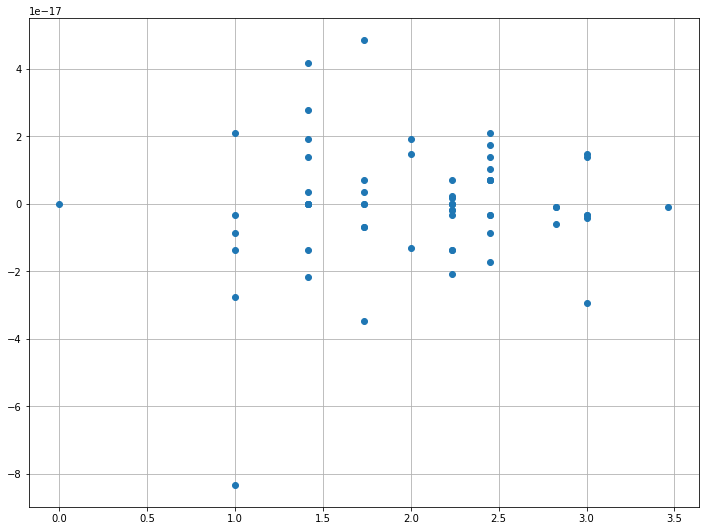

In [52]:
fig, axe = plt.subplots(figsize=(12,9))
it = 7
axe.plot(r, (wave_org_r[it].real-wave_alt_r[it].real), 'o')
#axe.plot(r, wave_alt_r[it], 'o')
axe.grid()